In [ ]:
# hide
from pymemri import *
from pymemri.plugin.pluginbase import run_plugin

# pymemri

> Pymemri is a python library for creating <b>Plugins</b> for the Memri Personal online datastore [(pod)](https://gitlab.memri.io/memri/pod). Pymemri has a PodClient to communicate with the pod, and tools to build and test plugins.

[![Gitlab pipeline status (self-hosted)](https://img.shields.io/gitlab/pipeline/memri/pymemri/dev?gitlab_url=https%3A%2F%2Fgitlab.memri.io&label=CI&logo=gitlab&style=plastic)](https://gitlab.memri.io/memri/pymemri/-/pipelines/latest)
[![Discourse status](https://img.shields.io/discourse/status?color=00A850&label=Discourse&logo=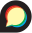&server=https%3A%2F%2Fdiscourse.memri.io)](https://discourse.memri.io) 
[![Twitter URL](https://img.shields.io/twitter/url?label=%40YourMemri&logo=twitter&style=plastic&url=https%3A%2F%2Ftwitter.com%2FYourMemri)](https://twitter.com/YourMemri)

Plugins connect and add the information to your Pod. Plugins that <b>import your data from external services</b> are called **Importers** (Gmail, WhatsApp, etc.). Plugins that <b>connect new data to the existing data</b> are called  **indexers** (face recognition, spam detection, object detection, etc.). Lastly there are plugins that <b>execute actions</b> (sending messages, uploading files). This repository is built with [nbdev](https://github.com/fastai/nbdev), which means that the repo structure has a few differences compared to a standard python repo. 

## Installing

### As a package
```bash
pip install pymemri
```

### Development
To install the Python package, and correctly setup nbdev for development run:
```bash
pip install -e . && nbdev_install_git_hooks
```
The last command configures git to automatically clean metadata from your notebooks before a commit.

## Quickstart: Pod Client

To use the pymemri `PodClient`, we first need to have a pod running. The quickest way to do this is to install from the [pod repo](https://gitlab.memri.io/memri/pod), and run `./examples/run_development.sh` from within that repo.

```
from pymemri.data.schema import *
from pymemri.pod.client import *

class Dog(Item):
    def __init__(self, name, age, id=None, deleted=None):
        super().__init__(id=id, deleted=deleted)
        self.name = name
        self.age = age
    
    @classmethod
    def from_json(cls, json):
        id = json.get("id", None)
        name = json.get("name", None)
        age = json.get("age", None)
        return cls(id=id,name=name,age=age)

client = PodClient()
example_dog = Dog("max", 2)
client.add_to_schema(example_dog)
dog = Dog("bob", 3)
client.create(dog)
```

## Quickstart: Running a plugin

After installation, users can use the plugin CLI to manually run a plugin. For more information on how to build a plugin, see `run_plugin`.

```bash
run_plugin --pod_full_address=<pod_address> --plugin_run_id=<plugin_run_id> --owner_key=<owner_key> \
            --database_key=<dabase_key>
```

## Docs

- [pymemri docs](http://memri.docs.memri.io/pymemri/pod.client.html#File-API)
- [plugin tutorial](https://blog.memri.io/getting-started-building-a-plugin/)

## Nbdev & Jupyter Notebooks
The Python integrators are written in [nbdev](https://nbdev.fast.ai/) ([video](https://www.youtube.com/watch?v=9Q6sLbz37gk&t=1301s)). With nbdev, it is encouraged to write code in 
[Jupyter Notebooks](https://jupyter.readthedocs.io/en/latest/install/notebook-classic.html). Nbdev syncs all the notebooks in `/nbs` with the python code in `/pymemri`. Tests are written side by side with the code in the notebooks, and documentation is automatically generated from the code and markdown in the notebooks and exported into the `/docs` folder. Check out the [nbdev quickstart](wiki/nbdev_quickstart.md) for an introduction, **watch the video linked above**, or see the [nbdev documentation](https://nbdev.fast.ai/) for a all functionalities and tutorials.